In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

# Code to read csv file into Colaboratory:
#!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Mounted at /content/drive


In [2]:
from google.colab import files

In [3]:
files.upload()

Saving common.py to common.py


{'common.py': b"# -*- coding: utf-8 -*-\r\nimport pandas as pd\r\nimport itertools\r\nfrom itertools import chain\r\nfrom collections import Counter\r\nfrom wordcloud import WordCloud\r\nimport matplotlib.pyplot as plt\r\n\r\ndef word_occurence(df):\r\n    # df['text'] is an instance of class 'pandas.core.series.Series'\r\n    words = df['text'].str.split()  \r\n    # words is an instance of class 'pandas.core.series.Series'\r\n    full_list = list(itertools.chain(*words))\r\n    counts = Counter(full_list)\r\n    index = []\r\n    values = []\r\n    for key, item in counts.items():\r\n        index.append(key)\r\n        values.append(item)\r\n    return pd.DataFrame(data={'occurence':values}, columns=['occurence'], index=index)\r\n        \r\ndef n_gram(df, n_gram_size):\r\n    # An n-gram is a contiguous sequence of n items from a given sample of text\r\n    \r\n    # df['text'] is an instance of class 'pandas.core.series.Series'\r\n    tokens = ' '.join([text for text in df['text']

In [4]:
# -*- coding: utf-8 -*-
import time
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import nltk
import csv
import re
import sys
import seaborn as sns
from wordcloud import WordCloud
#from common import n_gram, n_gram_history, top_n_gram_history
from matplotlib import dates
from collections import Counter



In [5]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
def get_side_effects(text, side_effects):
    se_list = []
    for regex in list(side_effects):
        if re.search(regex, str(text)):
            result = re.search(regex, str(text)).group()
            result = result.replace(' ', '')
            result = result.replace('\'', '')
            result = result.replace('[', '')
            result = result.replace(']', '')
            result = result.replace(',', ' ')
            se_list.append(result)
    return se_list
    
def plot_line(figname,df,x_label,y_label,fig_size=(10, 5)):
  plt.figure(figsize=fig_size)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  #fig, ax = plt.subplots(figsize=(20, 10))
  #ax = df.plot.line(ax=ax,linewidth=2)
  plt.plot( df, linestyle='-', color='red', linewidth=2)#linestyle='dashed'
  plt.xlabel(x_label, fontsize=18)
  plt.ylabel(y_label, fontsize=18)

  #plt.show()
  plt.savefig(figname)

def plot_line_2(figname,df,x_label,y_label,fig_size=(10, 5)):

  fig, ax = plt.subplots(figsize=fig_size)
  ax = df.plot.line(ax=ax,linewidth=2)
  ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)
  fig.tight_layout()

  #plt.show()
  plt.savefig(figname)

def example_plot(ax):
    ax.plot([1, 2])
    ax.set_xlabel('x-label', fontsize=12)
    ax.set_ylabel('y-label', fontsize=12)
    ax.set_title('Title', fontsize=14)

def subplot_line2(figname,df1,df2,x1_label,y1_label,x2_label,y2_label):

  fig, ax = plt.subplots(2,1,constrained_layout=True)
  ax[0] = df1.plot.line(ax=ax[0])
  ax[1] = df2.plot.line(ax=ax[1])
  ax[0].set_xlabel(x1_label,fontsize=12)
  ax[0].set_ylabel(y1_label,fontsize=12)
  ax[1].set_xlabel(x2_label,fontsize=12)
  ax[1].set_ylabel(y2_label,fontsize=12)
  plt.savefig(figname)

def subplot_line(figname,df1,df2,x1_label,y1_label,x2_label,y2_label):

  fig, ax = plt.subplots(2,1)
  ax[0] = df1.plot.line(ax=ax[0])
  ax[1] = df2.plot.line(ax=ax[1])
  ax[0].set_xlabel(x1_label)
  ax[0].set_ylabel(y1_label)
  ax[1].set_xlabel(x2_label)
  ax[1].set_ylabel(y2_label)
  ax[0].xaxis.set_major_locator(dates.YearLocator()) # This line does not work
  ax[0].xaxis.set_major_formatter(dates.DateFormatter('%Y'))

  ax[1].xaxis.set_major_locator(dates.MonthLocator())
  ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b'))
  fig.tight_layout()

  #plt.show()
  plt.savefig(figname)

def n_gram(df, n_gram_size):
    # An n-gram is a contiguous sequence of n items from a given sample of text
    
    # df['text'] is an instance of class 'pandas.core.series.Series'
    tokens = ' '.join([text for text in df['text']])
    tokens = tokens.split()
    ngrams = zip(*[tokens[i:] for i in range(n_gram_size)])
    list = [' '.join(ngram) for ngram in ngrams]
    counts = Counter(list)
    index = []
    values = []
    for key, item in counts.items():
        index.append(key)
        values.append(item)
            
    return pd.DataFrame(data={'occurence':values}, columns=['occurence'], index=index)

def n_gram_history(df, n_gram_size, period):
    # n-gram : yearly analysis
    df2 = None
    df3 = df.groupby(pd.Grouper(freq=period))
    for period, group in df3:
        df1 = n_gram(group, n_gram_size)
        df1.rename(columns={'occurence': period}, inplace=True)
        if df2 is None :
            df2 = df1
        else:
            df2 = pd.concat([df2, df1], axis=1, join='outer', sort=True)  
    df2 = df2.fillna(0)
    return df2

def top_n_gram_history(df, n_gram_size, period, limit):
    # n-gram : yearly analysis
    df2 = None 
    df = n_gram_history(df, n_gram_size, period)
    # To convert to percent of column total, uncomment next line
    #df = df.div(df.sum(axis=0), axis=1).multiply(100)  
    for period in list(df.columns):
        df1 = df.nlargest(limit, [period])                      # Period top rows
        if df2 is None:
            df2 = df1
        else:
            df2 = pd.concat([df1, df2], join='inner')           # Concatenate period top 10
                
    df2 = df2.groupby(level=0).last()                           # Clean duplicate rows     
    return df2

def top_n_gram_history_2(df, n_gram_size, period, limit):
    # n-gram : yearly analysis
    df = n_gram_history(df, n_gram_size, period)
    df2 = pd.DataFrame()
    periods = list(df.columns)
    for period in periods:
        top_index_list = list(df.nlargest(limit, [period]).index)
        df2[period] = top_index_list
    return df2


In [7]:
# Execution start here
#dir = "data/" # ie: /Users/test/Documents/Leevothyrox/data/
dir = '/content/drive/MyDrive/Thèse Lévothyrox/2 JP Colab Notebooks/' # Files directory (in/out)

side_effects_min_freq = 10
#pd.options.mode.chained_assignment = None

levo_side_effects_extended = ['fatigu\S*', 'astheni\S*',
               'insomni\S*',
               'ma\S* d\S* tete', 'ma\S* \S* d\S* tete' 'cephal\S*',
               'vertig\S*',
               'depressi\S*', 'deprim\S*', 'suicid\S*',
               'douleur\S* musculair\S*', 'douleur\S* \S* musculair\S*', 'myalgi\S*',
               'douleur\S* articulair\S*', 'douleur\S* \S* articulair\S*', 'douleur\S* a\S* articulation\S*', 'douleur\S* \S* a\S* articulation\S*', 'douleur\S* d\S* articulation\S*', 'douleur\S* \S* d\S* articulation\S*', 'douleur\S* articulation\S*', 'douleur\S* \S* articulation\S*', 'arthralgi\S*',
               'chut\S* d\S* cheveu\S*', 'chut\S* \S* d\S* cheveu\S*', 'chut\S* cheveu\S*', 'chut\S* \S* cheveu\S*', 'pert\S* cheveu\S*', 'pert\S* \S* cheveu\S*', 'pert\S* d\S* cheveu\S*', 'pert\S* \S* d\S* cheveu\S*',
               'pri\S* d\S* poid\S*', 'pri\S* \S* d\S* poid\S*', 'prendre poid\S*', 'prendre \S* poid\S*', 'prendre d\S* poid\S*', 'prendre \S* d\S* poid\S*',
               'pert\S* poid\S*', 'pert\S* \S* poid\S*', 'pert\S* d\S* poid\S*', 'pert\S* \S* d\S* poid\S*',
               'troubl\S* memoir\S*', 'troubl\S* \S* memoir\S*', 'troubl\S* \S* \S* memoir\S*', 'troubl\S* \S* \S* \S* memoir\S*',
               'anxie\S*',
               'nervosit\S*', 'nerveu\S*', 'irritabilit\S*', 'irritabl\S*',
               'nausee', 'nauseeu\S*',
               'diar\S*',
               'constip\S*',
               'sue', 'suee', 'suees', 'suer', 'sueur\S*', 'transpi\S*',
               'acouphen\S*',
               'tachycardi\S*','arythmi\S*', 'hyperten\S*', 'hypoten\S*', 'hyper ten\S*', 'hypo ten\S*']

# Read data
df = pd.read_csv(dir + '/data/dataset_doctissimo_updated.csv', encoding='utf8')
print('\n*****************\nFile <dataset_doctissimo_updated_labeled.csv> has been loaded\n*****************\n')



*****************
File <dataset_doctissimo_updated_labeled.csv> has been loaded
*****************



In [ ]:
df

,date,user,text,url,year,words_count
0,2020-03-21,freesia53,suivre thyroidite hasimoto deconvenue levothyr...,https://forum.doctissimo.fr/sante/thyroide-pro...,2020,52
1,2020-03-13,petitbouch​on,medecin prescrit hypothyroidie secondaire tsh ...,https://forum.doctissimo.fr/sante/thyroide-pro...,2020,16
2,2020-03-13,Susanne in F,equivalent pifometre savoir exactement dosage ...,https://forum.doctissimo.fr/sante/thyroide-pro...,2020,24
3,2020-03-13,NotYourMaj​esty,hypothyroidie traitement an quotidiennement mi...,https://forum.doctissimo.fr/sante/thyroide-pro...,2020,34
4,2020-03-11,Clem120,date savoir fille atteinte syndrome interrupti...,https://forum.doctissimo.fr/sante/thyroide-pro...,2020,31
...,...,...,...,...,...,...
6768,2016-01-02,Smoothie27​7,endocrinologue prescrit prise sang verifie ver...,https://forum.doctissimo.fr/sante/thyroide-pro...,2016,42
6769,2016-01-02,seb58dy,converser atteinte thyroidit hashimoto traitem...,https://forum.doctissimo.fr/sante/thyroide-pro...,2016,12
6770,2016-01-01,glo18fz,montrent hypothyroidie fier tsh medicament tsh,https://forum.doctissimo.fr/sante/thyroide-pro...,2016,6
6771,2016-01-01,.Dr40av,taux tsh hyperthyroidie falloir revoir medecin...,https://forum.doctissimo.fr/sante/thyroide-pro...,2016,10


In [8]:
# Drop useless columns
df = df.drop(columns = ['user', 'url', 'year', 'words_count'])#sentiment
# Cast date to datetime
df['date'] = pd.to_datetime(df['date'])
# Set date column as index
df = df.set_index('date')
# Side effects listed in text
df['side_effect_count'] = df['text'].str.count(r'\b|\b'.join(levo_side_effects_extended))


In [ ]:
df

,text,side_effect_count
date,,
2020-03-21,suivre thyroidite hasimoto deconvenue levothyr...,1
2020-03-13,medecin prescrit hypothyroidie secondaire tsh ...,0
2020-03-13,equivalent pifometre savoir exactement dosage ...,0
2020-03-13,hypothyroidie traitement an quotidiennement mi...,0
2020-03-11,date savoir fille atteinte syndrome interrupti...,0
...,...,...
2016-01-02,endocrinologue prescrit prise sang verifie ver...,0
2016-01-02,converser atteinte thyroidit hashimoto traitem...,1
2016-01-01,montrent hypothyroidie fier tsh medicament tsh,0



*****************
Daily occurence in 2016-2020... Check
*****************



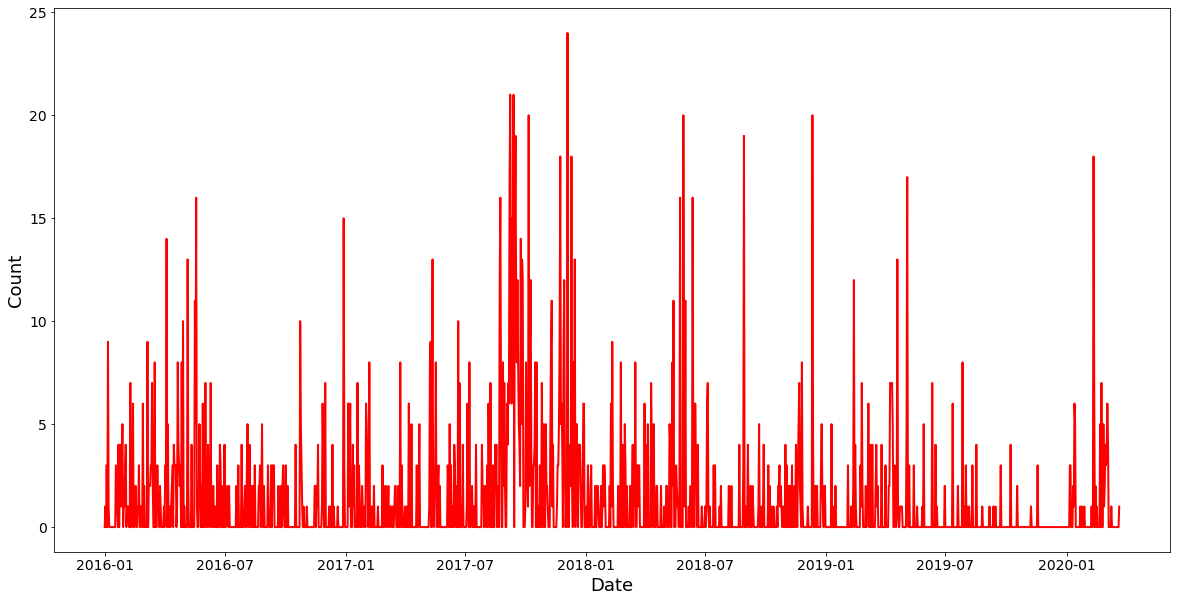

In [11]:

# Downsample to sample size = 1 day
ONEDAY = pd.offsets.Day(1)
df_daily = df.resample(ONEDAY)["side_effect_count"].sum()

# Daily occurences of side effects reported in messages, all dates

plot_line(dir + 'data/Figures/SE-2016-2020.png',df_daily,'Date','Count',(20,10))
print('\n*****************\nDaily occurence in 2016-2020... Check\n*****************\n')



In [ ]:
isinstance(df_daily, pd.Series)


True


*****************
Daily occurence in 2017... Check
*****************



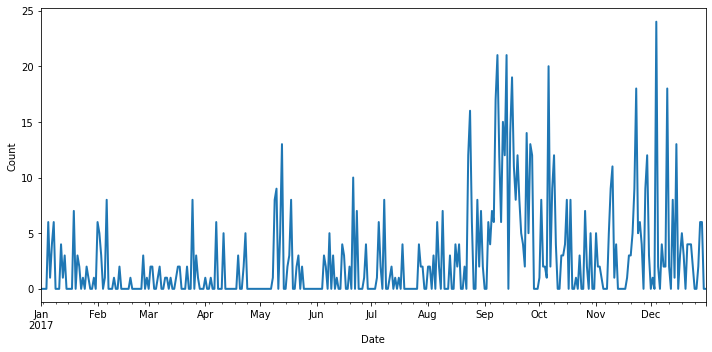

In [12]:
# Daily occurences of side effects reported in messages, 2017
#fig, ax = plt.subplots(figsize=(20, 10))
#ax = df_daily[df_daily.index.year==2017].plot.line(ax=ax)
#plt.show()
#plt.savefig(dir + 'data/Figures/SE-2017.png')
plot_line_2(dir + 'data/Figures/SE-2017.png',df_daily[df_daily.index.year==2017],'Date','Count')

print('\n*****************\nDaily occurence in 2017... Check\n*****************\n')



In [13]:
def normalize_counts(df):
  df_norm = (df - df.mean())/df.std()
  return df_norm

def rolling_average_filter(df, window_size):
  df_filtered = df.rolling(window=window_size).mean()
  return df_filtered



*****************
Dataframe side effects
*****************

date
2020-03-21                                           [insomnie]
2020-03-13                                                   []
2020-03-13                                                   []
2020-03-13                                                   []
2020-03-11                                                   []
2020-03-09                                                   []
2020-03-09                                           [deprimer]
2020-03-07                                                   []
2020-03-06                                                   []
2020-03-05                                                   []
2020-03-04                                  [fatiguer, vertige]
2020-03-04                                                   []
2020-03-04                                                   []
2020-03-04                                                   []
2020-03-04                            

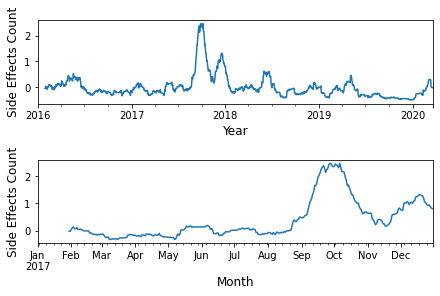

In [14]:
# Normalize 
df_normalized = normalize_counts(df_daily)#(df_daily - df_daily.mean())/df_daily.std()

df_count_SE_year_norm = rolling_average_filter(df_normalized, 30)#df_normalized.rolling(window=30).mean()
df_normalized_2017 = df_normalized[df_normalized.index.year==2017]
df_count_SE_2017_month_norm = rolling_average_filter(df_normalized_2017,30)#df_normalized_2017.rolling(window=30).mean()
subplot_line2(dir + 'data/Figures/subplot_SE_2017_20162020.pdf',df_count_SE_year_norm,df_count_SE_2017_month_norm,'Year','Side Effects Count','Month','Side Effects Count')
df['side_effects'] = df['text'].apply(get_side_effects, side_effects=levo_side_effects_extended)
print('\n*****************\nDataframe side effects\n*****************\n')
print(df['side_effects'].head(20))


#plot_line_2(dir + 'data/Figures/SE-2016-2020-normalized.png',df_normalized.rolling(window=30).mean(),'Date','Count')
#print('\n*****************\nAll Normalized... Check\n*****************\n')
#plot_line_2(dir + 'data/Figures/SE-2017-normalized.png',df_normalized[df_normalized.index.year==2017].rolling(window=30).mean(),'Date','Count')
#print('\n*****************\n2017 Normalized... Check\n*****************\n')

In [ ]:
df_count_SE_year_norm

date
2016-01-01         NaN
2016-01-02         NaN
2016-01-03         NaN
2016-01-04         NaN
2016-01-05         NaN
                ...   
2020-03-17   -0.016510
2020-03-18   -0.016510
2020-03-19   -0.016510
2020-03-20   -0.016510
2020-03-21   -0.005373
Freq: D, Name: side_effect_count, Length: 1542, dtype: float64

In [15]:
# Build most common side effects list
a = ' '.join(np.concatenate(df['side_effects']))
words = nltk.word_tokenize(a)
word_dist = nltk.FreqDist(words)
most_common_side_effects = pd.DataFrame(list(filter(lambda x: x[1] >= side_effects_min_freq, word_dist.items())), columns = ['side_effect', 'frequency'])
mcse_list = most_common_side_effects['side_effect'].to_list()

# Restrict side effects to most_common_side_effects and store in column  
df['most_common_side_effects'] = df['side_effects'].apply(lambda l :[x for x in l if np.isin(x, mcse_list)])


In [ ]:
df

,text,side_effect_count,side_effects,most_common_side_effects
date,,,,
2020-03-21,suivre thyroidite hasimoto deconvenue levothyr...,1,[insomnie],[insomnie]
2020-03-13,medecin prescrit hypothyroidie secondaire tsh ...,0,[],[]
2020-03-13,equivalent pifometre savoir exactement dosage ...,0,[],[]
2020-03-13,hypothyroidie traitement an quotidiennement mi...,0,[],[]
2020-03-11,date savoir fille atteinte syndrome interrupti...,0,[],[]
...,...,...,...,...
2016-01-02,endocrinologue prescrit prise sang verifie ver...,0,[],[]
2016-01-02,converser atteinte thyroidit hashimoto traitem...,1,[douleurarticulaire],[douleurarticulaire]
2016-01-01,montrent hypothyroidie fier tsh medicament tsh,0,[],[]


In [ ]:
most_common_side_effects

,side_effect,frequency
0,insomnie,90
1,deprimer,97
2,fatiguer,668
3,vertige,52
4,pertecheveux,54
5,irritabilite,23
6,vertiges,85
7,hypotension,14
8,depression,91
9,acouphene,11


In [16]:

# New dataframe
vector = pd.DataFrame(columns = mcse_list)
for side_effect in mcse_list:
    vector[side_effect] = df.loc[df['most_common_side_effects'].astype(bool)]['most_common_side_effects'].apply(lambda l: int(side_effect in l))
# For testing purpose 
#print(vector.astype(bool).sum(axis=0))
print('\n*****************\nVector\n*****************\n')
print(vector.head(20))



*****************
Vector
*****************

            insomnie  deprimer  fatiguer  ...  fatigue  transpir  depressif
date                                      ...                              
2020-03-21         1         0         0  ...        0         0          0
2020-03-09         0         1         0  ...        0         0          0
2020-03-04         0         0         1  ...        0         0          0
2020-03-03         0         0         1  ...        0         0          0
2020-03-02         0         0         1  ...        0         0          0
2020-03-02         0         0         1  ...        0         0          0
2020-02-29         1         1         1  ...        0         0          0
2020-02-28         0         0         1  ...        0         0          0
2020-02-27         0         0         0  ...        0         0          0
2020-02-26         0         0         1  ...        0         0          0
2020-02-26         0         0         1  .

In [ ]:
vector

,insomnie,deprimer,fatiguer,vertige,pertecheveux,irritabilite,vertiges,hypotension,depression,acouphene,tachycardie,douleurarticulaire,nausee,pertepoids,pertecheveu,douleurmusculaire,transpiration,hypertension,irritable,nervosite,chutecheveu,anxiete,sue,douleurmusculairearticulaire,nerveux,sueur,chutecheveux,suee,suees,constipation,suicide,anxieux,diarrhee,diarrhees,fatigue,transpir,depressif
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-21,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-09,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-04,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-03,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-02,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-06,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2016-01-04,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-01-04,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
 vector.sum(axis=1)

date
2020-03-21    1
2020-03-09    1
2020-03-04    2
2020-03-03    3
2020-03-02    1
             ..
2016-01-06    5
2016-01-04    1
2016-01-04    1
2016-01-04    1
2016-01-02    1
Length: 1131, dtype: int64

In [17]:
MCSE_count = vector.sum(axis=1)

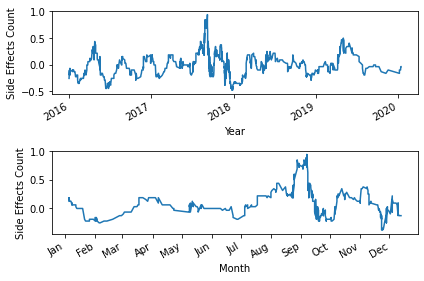

In [18]:
MCSE_count_normalized = normalize_counts(MCSE_count)

MCSE_count_normal_filter = rolling_average_filter(MCSE_count_normalized, 30)#df_normalized.rolling(window=30).mean()
MCSE_count_normal_2017 = MCSE_count_normalized[MCSE_count_normalized.index.year==2017]
MCSE_count_normal_filter_2017 = rolling_average_filter(MCSE_count_normal_2017,30)
subplot_line(dir + 'data/Figures/subplot_MCSE_2017_20162020.pdf',MCSE_count_normal_filter,MCSE_count_normal_filter_2017,'Year','Side Effects Count','Month','Side Effects Count')


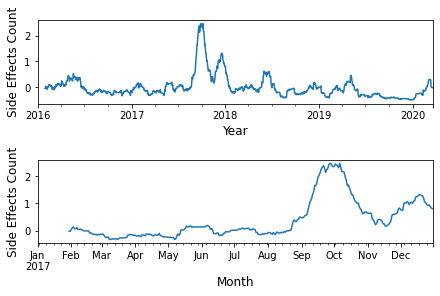

In [ ]:
subplot_line2(dir + 'data/Figures/subplot_SE_2017_20162020.pdf',df_count_SE_year_norm,df_count_SE_2017_month_norm,'Year','Side Effects Count','Month','Side Effects Count')


In [ ]:
isinstance(MCSE_count_normalized, pd.Series)


True

In [ ]:
isinstance(MCSE_count_normal_filter_2017, pd.Series)


True


*****************
Correlation matrix
*****************
                    insomnie  deprimer  fatiguer  ...   fatigue  transpir  depressif
insomnie            1.000000 -0.020054 -0.107346  ... -0.044207 -0.001057   0.004150
deprimer           -0.020054  1.000000 -0.040397  ... -0.046049 -0.033028  -0.030354
fatiguer           -0.107346 -0.040397  1.000000  ... -0.180589 -0.028309  -0.064071
vertige            -0.002152 -0.037085 -0.083389  ... -0.033005 -0.023672  -0.021756
pertecheveux        0.041414 -0.024157  0.068358  ... -0.033665  0.014756   0.020062
irritabilite       -0.019217 -0.021758  0.056252  ...  0.020946 -0.015536  -0.014278
vertiges            0.027709 -0.075334 -0.062770  ...  0.025574  0.000723  -0.028251
hypotension        -0.003370 -0.005732  0.011891  ... -0.016832 -0.012072  -0.011095
depression         -0.026921  0.013877 -0.097489  ... -0.022364 -0.001402  -0.029315
acouphene          -0.029140  0.001821 -0.009104  ... -0.014900 -0.010687  -0.009821
tachycard

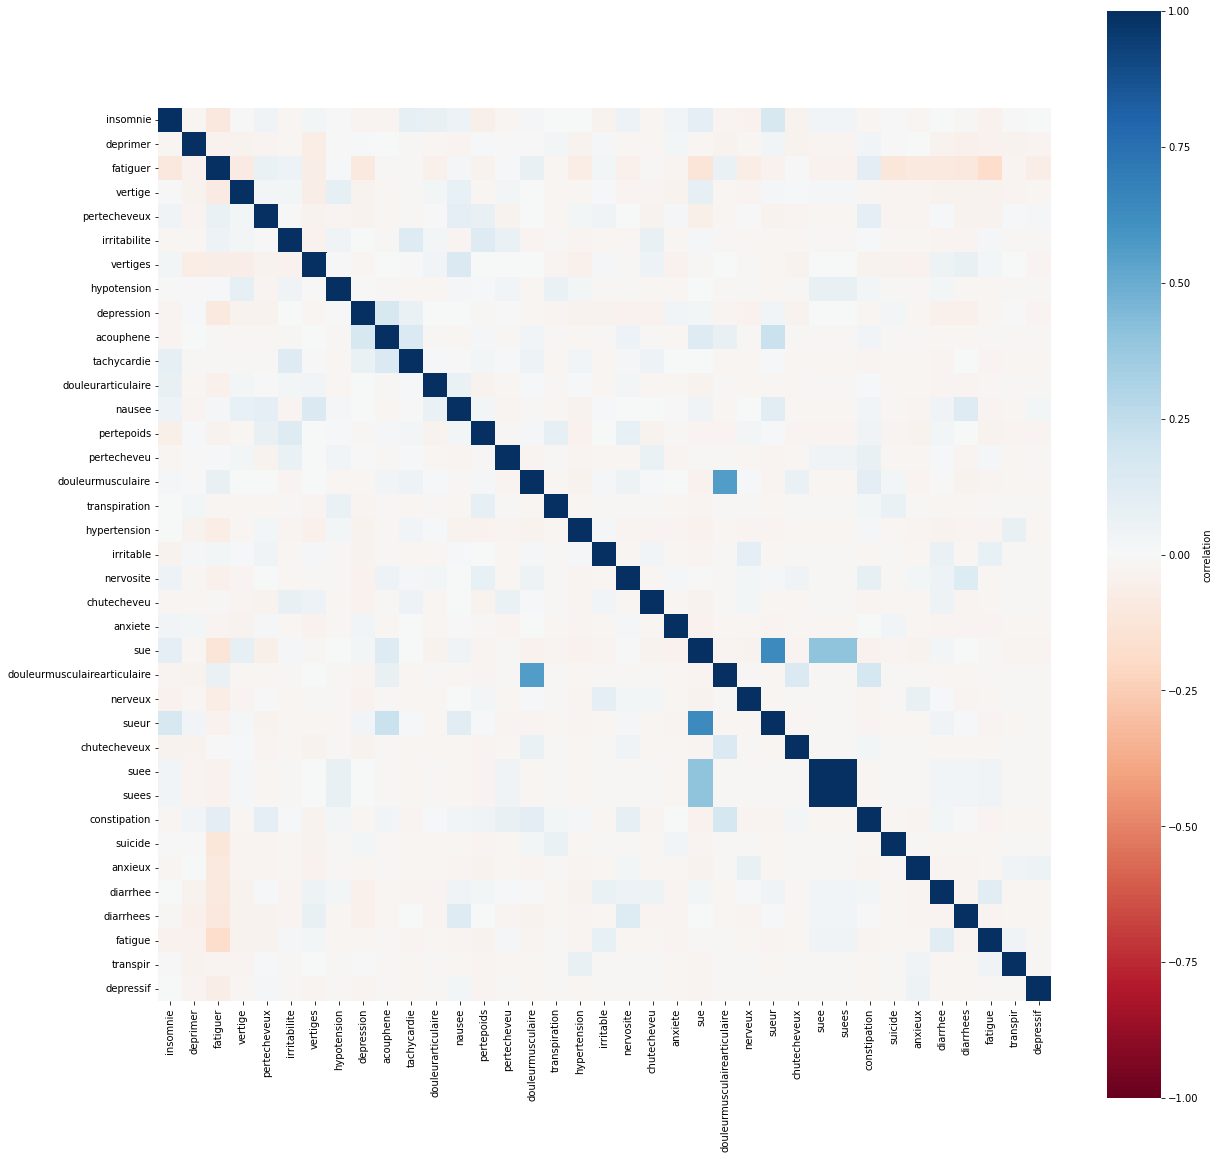

In [19]:

# Correlation matrix
correlations = vector.corr()
print('\n*****************\nCorrelation matrix\n*****************')
print(correlations.head(20))

cor_1 = correlations.where(np.triu(np.ones(correlations.shape)).astype(bool)).stack().sort_values(ascending=False).reset_index()
cor_1 = cor_1.loc[cor_1['level_0'] != cor_1['level_1']]
cor_1.columns = ['side_effect_1','side_effect_2','Correlation']
print(cor_1.head(20))

# plot the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(correlations, cmap='RdBu', vmin=-1, vmax=1, square = True, cbar_kws={'label':'correlation'})
#plt.show()
plt.savefig(dir + 'data/Figures/SE_correlations_heatmap.png')




*****************
WC Generating...
*****************
Number of words in all_text: 26093


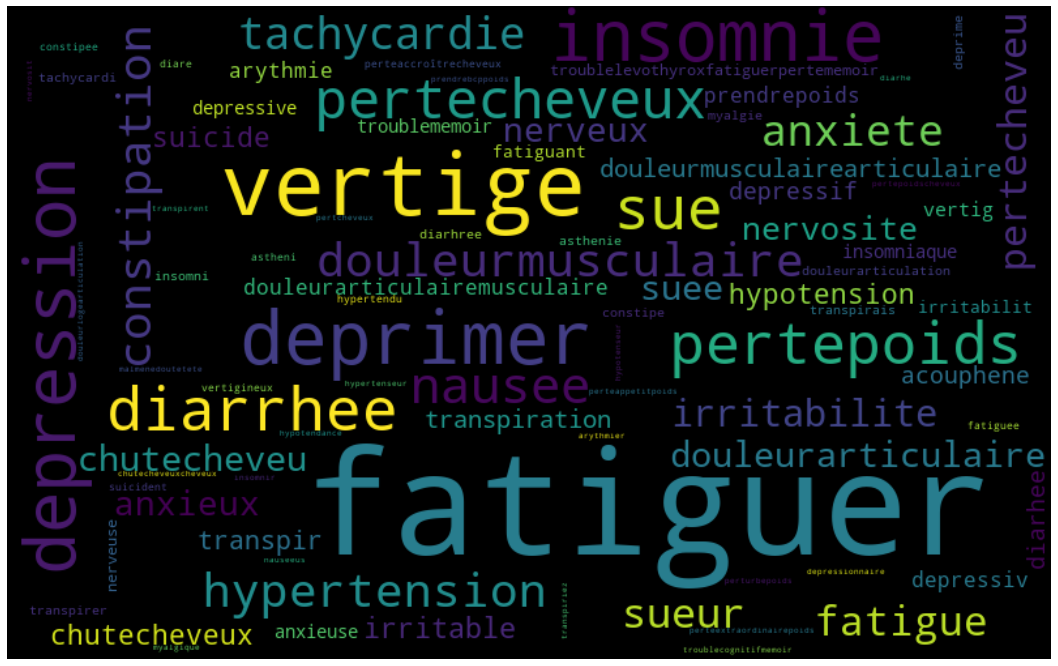

In [20]:
all_text = ' '.join([text for text in df['side_effects'].apply(str).str.replace('[{}]'.format(string.punctuation), '', regex=True)])
print('\n*****************\nWC Generating...\n*****************')
print('Number of words in all_text:', len(all_text))
wordcloud = WordCloud(width=800, height=500,random_state=21, max_font_size=110, collocations=False).generate(all_text)
plt.figure(figsize=(20, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');
#plt.show()
plt.savefig(dir + 'data/Figures/SE-WC.pdf')



In [21]:
df1= df.copy()
# Create a 'text' column for use in N_gram and top_N-gram functions
# This has to be improved
# Option 0 : pass a series
# Option 1 : pass the column name in the finctions parameters
# Option 2 : limite de dataframe to a single column
df1['text'] = df1['side_effects'].apply(lambda l: ' '.join(l))


In [22]:
df_ngram_SE_Y  = n_gram_history(df1, 2, 'Y')
print('\n*****************\nn_gram_history\n*****************')
print(df_ngram_SE_Y)
print('\n*****************\ntop_n_gram_history\n*****************')
df_top_ngram_SE_Y = top_n_gram_history(df1, 2, 'Y', 10)
print(df_top_ngram_SE_Y)

# Save file
#df.to_csv(dir + 'dataset_doctissimo_side_effect_1.csv', index=False, sep=',', header=True, encoding='utf8')


*****************
n_gram_history
*****************
                         2016-12-31  2017-12-31  ...  2019-12-31  2020-12-31
acouphene fatiguer              0.0         5.0  ...         0.0         0.0
acouphene insomnie              0.0         0.0  ...         0.0         0.0
acouphene nervosite             0.0         0.0  ...         0.0         0.0
acouphene tachycardie           1.0         0.0  ...         0.0         2.0
acouphene vertiges              0.0         1.0  ...         0.0         0.0
...                             ...         ...  ...         ...         ...
vertiges troublememoir          0.0         0.0  ...         0.0         0.0
vertiges vertig                 0.0         1.0  ...         0.0         0.0
vertiges vertige                0.0         1.0  ...         0.0         0.0
vertiges vertiges               2.0         4.0  ...         0.0         0.0
vertigineux tachycardie         0.0         2.0  ...         0.0         0.0

[660 rows x 5 columns]


In [23]:
df_ngram_SE_M  = n_gram_history(df1, 2, 'M')
print('\n*****************\nn_gram_history\n*****************')
print(df_ngram_SE_M)
print('\n*****************\ntop_n_gram_history\n*****************')
df_top_ngram_SE_M = top_n_gram_history(df1, 2, 'M', 10)
print(df_top_ngram_SE_M)


*****************
n_gram_history
*****************
                         2016-01-31  2016-02-29  ...  2020-02-29  2020-03-31
acouphene fatiguer              0.0         0.0  ...         0.0         0.0
acouphene insomnie              0.0         0.0  ...         0.0         0.0
acouphene nervosite             0.0         0.0  ...         0.0         0.0
acouphene tachycardie           0.0         0.0  ...         2.0         0.0
acouphene vertiges              0.0         0.0  ...         0.0         0.0
...                             ...         ...  ...         ...         ...
vertiges troublememoir          0.0         0.0  ...         0.0         0.0
vertiges vertig                 0.0         0.0  ...         0.0         0.0
vertiges vertige                0.0         0.0  ...         0.0         0.0
vertiges vertiges               0.0         0.0  ...         0.0         0.0
vertigineux tachycardie         0.0         0.0  ...         0.0         0.0

[650 rows x 51 columns]

In [ ]:
df_ngram_SE_Y

,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31
acouphene fatiguer,0.0,5.0,0.0,0.0,0.0
acouphene insomnie,0.0,0.0,1.0,0.0,0.0
acouphene nervosite,0.0,0.0,1.0,0.0,0.0
acouphene tachycardie,1.0,0.0,0.0,0.0,2.0
acouphene vertiges,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
vertiges troublememoir,0.0,0.0,1.0,0.0,0.0
vertiges vertig,0.0,1.0,0.0,0.0,0.0
vertiges vertige,0.0,1.0,0.0,0.0,0.0
vertiges vertiges,2.0,4.0,0.0,0.0,0.0


In [ ]:
df_top_ngram_SE_Y

,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31
acouphene tachycardie,1.0,0.0,0.0,0.0,2.0
arythmie fatiguer,0.0,4.0,1.0,0.0,1.0
astheni insomniaque,0.0,0.0,0.0,0.0,1.0
asthenie acouphene,0.0,0.0,0.0,0.0,1.0
constipation fatiguer,8.0,6.0,6.0,4.0,0.0
depression fatiguer,8.0,13.0,9.0,1.0,1.0
deprimer fatiguer,11.0,14.0,6.0,2.0,0.0
diarrhees fatiguer,0.0,10.0,4.0,0.0,0.0
douleurarticulairemusculaire douleurarticulaire,0.0,4.0,0.0,3.0,0.0
douleurmusculaire douleurmusculairearticulaire,8.0,0.0,3.0,1.0,0.0


In [24]:
df_top_ngram_SE_Y.loc['fatiguer vertiges'] = df_top_ngram_SE_Y.loc['fatiguer vertige'] + df_top_ngram_SE_Y.loc['fatiguer vertiges'] + df_top_ngram_SE_Y.loc['vertiges fatiguer'] 
df_top_ngram_SE_Y.loc['douleurarticulairemusculaire douleurarticulaire'] = df_top_ngram_SE_Y.loc['douleurarticulairemusculaire douleurarticulaire'] + df_top_ngram_SE_Y.loc['douleurmusculaire douleurmusculairearticulaire']
df_top_ngram_SE_Y.loc['deprimer fatiguer'] = df_top_ngram_SE_Y.loc['deprimer fatiguer'] + df_top_ngram_SE_Y.loc['fatiguer deprimer'] + df_top_ngram_SE_Y.loc['fatiguer depression'] + df_top_ngram_SE_Y.loc['depression fatiguer'] 

df_top_ngram_SE_Y = df_top_ngram_SE_Y.drop(['douleurmusculaire douleurmusculairearticulaire','fatiguer vertige', 'vertiges fatiguer','fatiguer deprimer', 'fatiguer depression','depression fatiguer'])

df_top_ngram_SE_Y = df_top_ngram_SE_Y.rename(index={'douleurarticulairemusculaire douleurarticulaire': 'doleurs musculaires articulaires'})

In [25]:
df_top_ngram_SE_Y

,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31
acouphene tachycardie,1.0,0.0,0.0,0.0,2.0
arythmie fatiguer,0.0,4.0,1.0,0.0,1.0
astheni insomniaque,0.0,0.0,0.0,0.0,1.0
asthenie acouphene,0.0,0.0,0.0,0.0,1.0
constipation fatiguer,8.0,6.0,6.0,4.0,0.0
deprimer fatiguer,38.0,63.0,36.0,13.0,2.0
diarrhees fatiguer,0.0,10.0,4.0,0.0,0.0
doleurs musculaires articulaires,8.0,4.0,3.0,4.0,0.0
fatiguer douleurmusculaire,12.0,6.0,2.0,3.0,0.0
fatiguer fatiguer,60.0,74.0,42.0,23.0,15.0


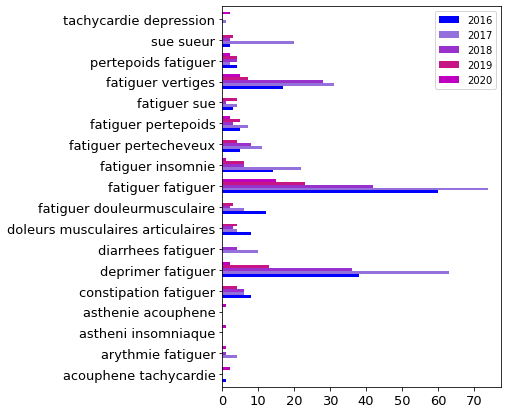

In [26]:

df_top_ngram_SE_Y.plot(kind='barh',stacked=False, figsize=(5,7),fontsize=13,width=0.7,color=['blue', 'mediumpurple', 'darkorchid', 'mediumvioletred', 'm'])
plt.legend(["2016", "2017","2018","2019","2020"]);

plt.savefig(dir + 'data/Figures/top_ngram_SE.pdf',bbox_inches = 'tight')



In [ ]:
df_top_ngram_SE_M

,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
acouphene fatiguer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
acouphene insomnie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
acouphene nervosite,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
acouphene tachycardie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
acouphene vertiges,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vertiges fatiguer,0.0,0.0,2.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
vertiges nausee,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
vertiges pertecheveu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
vertiges pertepoids,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_t =  df_top_ngram_SE_M.T
df_t.head()

,acouphene fatiguer,acouphene insomnie,acouphene nervosite,acouphene tachycardie,acouphene vertiges,anxiete anxiete,anxiete arythmie,anxiete constipation,anxiete fatiguer,anxiete insomnie,anxiete nausee,anxiete nerveuse,anxiete nervosite,anxiete vertige,anxiete vertiges,anxieuse deprimer,anxieux constipee,anxieux depressif,anxieux fatigue,anxieux fatiguer,anxieux nervosite,anxieux tachycardie,anxieux transpir,arythmie fatiguer,arythmier fatiguer,astheni insomniaque,asthenie acouphene,asthenie fatiguer,asthenie pertecheveux,chutecheveu fatiguer,chutecheveu hypertension,chutecheveu irritabilite,chutecheveu nerveux,chutecheveu pertecheveu,chutecheveu pertepoids,chutecheveux chutecheveuxcheveux,chutecheveux fatiguer,chutecheveux hypertension,chutecheveux insomnie,chutecheveux nervosite,...,hypertension vertige,hypotension fatiguer,hypotension tachycardie,insomni deprime,insomnie fatiguer,insomnie nausee,insomnie vertiges,irritabilite sue,irritable hypertension,myalgie sue,nausee constipation,nausee vertiges,nervosite constipation,nervosite diarrhees,nervosite fatiguer,pertecheveu fatiguer,pertecheveu tachycardie,pertecheveux fatiguer,pertecheveux nausee,pertecheveux vertiges,pertepoids chutecheveu,pertepoids depressiv,pertepoids fatiguer,pertepoids sue,pertepoids transpiration,sue douleurarticulairemusculaire,sue fatiguer,sue sueur,tachycardie depression,tachycardie fatiguer,transpir fatiguer,transpiration fatiguer,vertige douleurmusculaire,vertige nausee,vertiges diarrhees,vertiges fatiguer,vertiges nausee,vertiges pertecheveu,vertiges pertepoids,vertiges vertiges
2016-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-02-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-03-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2016-04-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_t = df_t.stack().reset_index()

In [ ]:
df_t=df_t.rename(columns={"level_0": "Date", "level_1": "Adverse Reactions Bi-grams", 0 :"Count"}) 



In [ ]:
df_t

,Date,Adverse Reactions Bi-grams,Count
0,2016-01-31,acouphene fatiguer,0.0
1,2016-01-31,acouphene insomnie,0.0
2,2016-01-31,acouphene nervosite,0.0
3,2016-01-31,acouphene tachycardie,0.0
4,2016-01-31,acouphene vertiges,0.0
...,...,...,...
10858,2020-03-31,vertiges fatiguer,0.0
10859,2020-03-31,vertiges nausee,0.0
10860,2020-03-31,vertiges pertecheveu,0.0
10861,2020-03-31,vertiges pertepoids,0.0


In [ ]:
df_t['Date'] = df_t['Date'].astype(str)

In [ ]:
df_t = df_t[df_t['Date'].str.contains('2017')]


In [ ]:
import altair as alt
source = df_t

alt.Chart(source).mark_line(point = True).encode(
    x = alt.X("Date:O", timeUnit="yearmonth", title="Date"),
    y="Count:Q",
    color=alt.Color("Adverse Reactions Bi-grams:N")
).properties(
    title="Adverse Reactions Bi-grams Per Month (2017)",
    width=600,
    height=300,
)

alt.Chart(...)